# Task 1- Iris flower Classification

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")



In [2]:
df=pd.read_csv(r"C:\Users\Sujata Kadam\Downloads\iris\bezdekIris.data")

In [3]:
df

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,Iris-virginica
145,6.3,2.5,5.0,1.9,Iris-virginica
146,6.5,3.0,5.2,2.0,Iris-virginica
147,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
df.columns=['Sepal_lenght','Sepal_width','petal_length','petal_width','class']
print(df)

     Sepal_lenght  Sepal_width  petal_length  petal_width           class
0             4.9          3.0           1.4          0.2     Iris-setosa
1             4.7          3.2           1.3          0.2     Iris-setosa
2             4.6          3.1           1.5          0.2     Iris-setosa
3             5.0          3.6           1.4          0.2     Iris-setosa
4             5.4          3.9           1.7          0.4     Iris-setosa
..            ...          ...           ...          ...             ...
144           6.7          3.0           5.2          2.3  Iris-virginica
145           6.3          2.5           5.0          1.9  Iris-virginica
146           6.5          3.0           5.2          2.0  Iris-virginica
147           6.2          3.4           5.4          2.3  Iris-virginica
148           5.9          3.0           5.1          1.8  Iris-virginica

[149 rows x 5 columns]


In [5]:
df.head()

,Sepal_lenght,Sepal_width,petal_length,petal_width,class
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [6]:
df.tail()

,Sepal_lenght,Sepal_width,petal_length,petal_width,class
144,6.7,3.0,5.2,2.3,Iris-virginica
145,6.3,2.5,5.0,1.9,Iris-virginica
146,6.5,3.0,5.2,2.0,Iris-virginica
147,6.2,3.4,5.4,2.3,Iris-virginica
148,5.9,3.0,5.1,1.8,Iris-virginica


In [7]:
df.shape

(149, 5)

In [8]:
df.isnull().sum().sum()

0

In [9]:
df.dtypes

Sepal_lenght    float64
Sepal_width     float64
petal_length    float64
petal_width     float64
class            object
dtype: object

In [10]:
# statisctical information of the data
df.describe()

,Sepal_lenght,Sepal_width,petal_length,petal_width
count,149.000000,149.000000,149.000000,149.000000
mean,5.848322,3.054362,3.773826,1.206040
std,0.828594,0.435810,1.760543,0.760354
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal_lenght  149 non-null    float64
 1   Sepal_width   149 non-null    float64
 2   petal_length  149 non-null    float64
 3   petal_width   149 non-null    float64
 4   class         149 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [12]:
df['class'].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        49
Name: class, dtype: int64

In [13]:
df['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

# Data Visualization

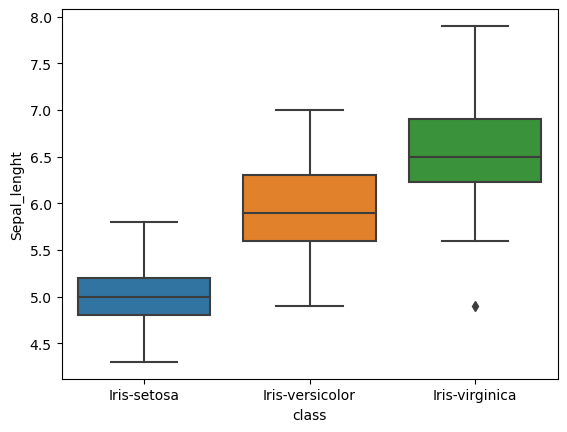

In [14]:
sns.boxplot(x='class',y='Sepal_lenght', data=df)
plt.show()

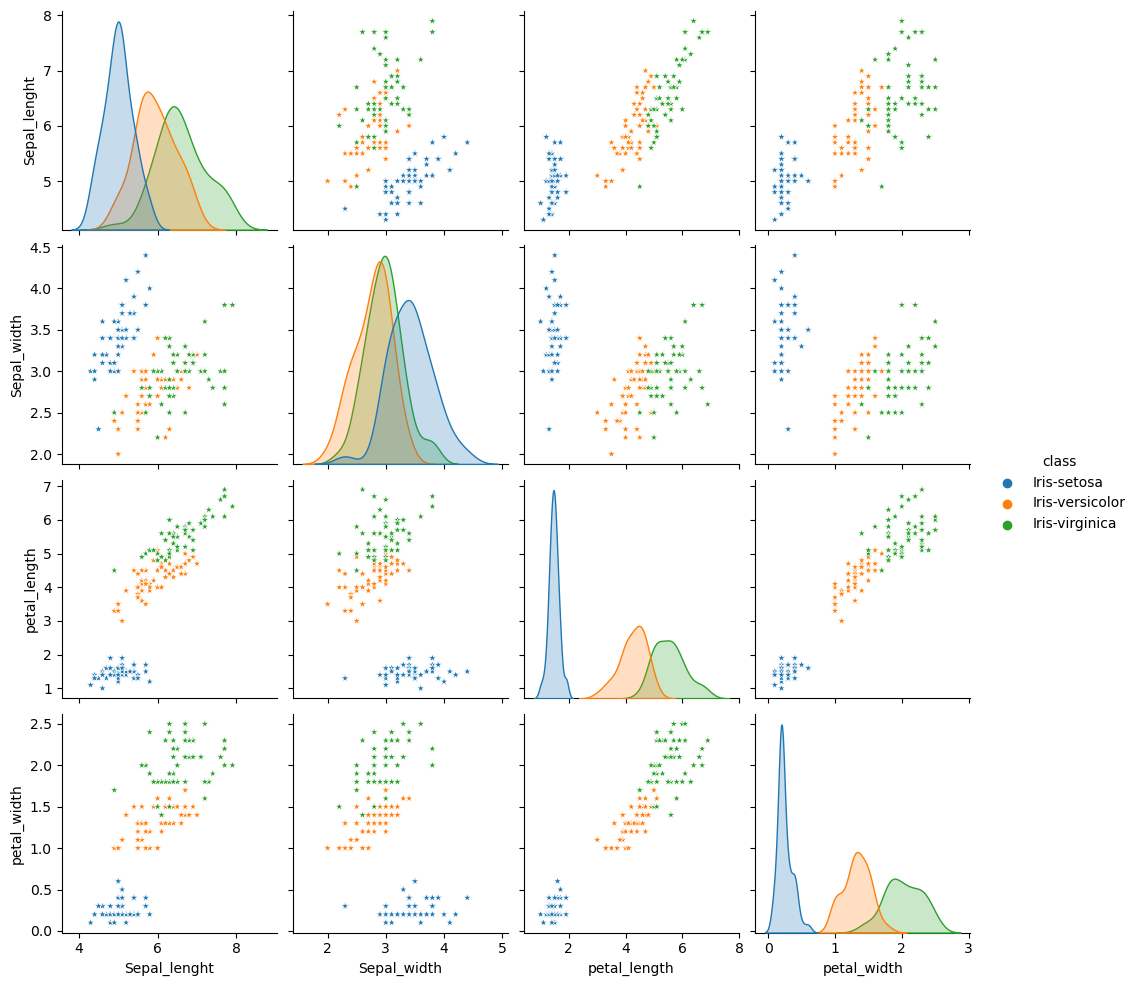

In [15]:
sns.pairplot(df, hue="class",markers='*');
plt.show()

# Train and evaluate model

In [16]:
X=df.drop('class',axis=1)
y=df['class']

In [17]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [18]:
print(X_test.shape)
print(X_train.shape)
print(y_train.shape)
print(y_test.shape)

(30, 4)
(119, 4)
(119,)
(30,)


In [19]:
from sklearn.neighbors import KNeighborsClassifier

In [20]:
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

<AxesSubplot:xlabel='Sepal_width', ylabel='petal_width'>

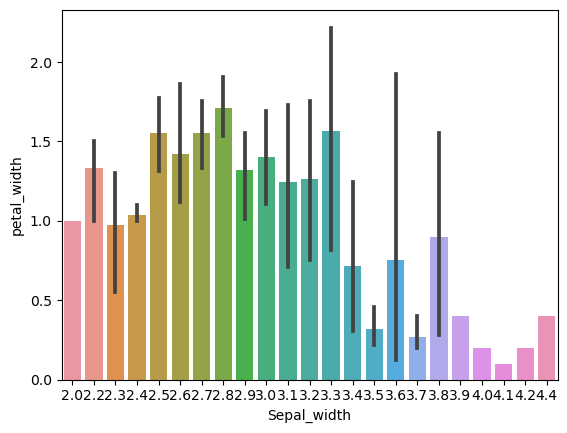

In [21]:
sns.barplot(data=df, x='Sepal_width', y='petal_width')

In [22]:
knn.score(X,y)

0.959731543624161

In [23]:
y_pred=knn.predict(X_test)

In [24]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


def evaluate(knn, X_train, X_test, y_train, y_test):
    y_test_pred = knn.predict(X_test)
    y_train_pred = knn.predict(X_train)

    print("TRAINIG RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_train, y_train_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_train, y_train_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_train, y_train_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

    print("TESTING RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test, y_test_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_test, y_test_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

In [25]:
evaluate(knn,X_train,X_test,y_train,y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[43  0  0]
 [ 0 34  3]
 [ 0  2 37]]
ACCURACY SCORE:
0.9580
CLASSIFICATION REPORT:
           Iris-setosa  Iris-versicolor  Iris-virginica  accuracy   macro avg  \
precision          1.0         0.944444        0.925000  0.957983    0.956481   
recall             1.0         0.918919        0.948718  0.957983    0.955879   
f1-score           1.0         0.931507        0.936709  0.957983    0.956072   
support           43.0        37.000000       39.000000  0.957983  119.000000   

           weighted avg  
precision      0.958147  
recall         0.957983  
f1-score       0.957961  
support      119.000000  
TESTING RESULTS: 
CONFUSION MATRIX:
[[ 6  0  0]
 [ 0 12  1]
 [ 0  0 11]]
ACCURACY SCORE:
0.9667
CLASSIFICATION REPORT:
           Iris-setosa  Iris-versicolor  Iris-virginica  accuracy  macro avg  \
precision          1.0         1.000000        0.916667  0.966667   0.972222   
recall             1.0         0.923077        1.000000  0.966667 